In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
csv = pd.read_csv('no_show_1_3.csv')
raw = pd.DataFrame(csv)
raw.head()
raw.shape

/Users/samstone/venvs/pdsh/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(21494, 54)

In [6]:
raw.shape

(21494, 54)

In [7]:
# drop all rows with any missing data
# full = raw.dropna()
full = raw
full.dtypes

user_id                                                                                       int64
num_quiz_responses                                                                            int64
time_before_quiz                                                                            float64
system                                                                                        int64
signed_up_with_facebook                                                                       int64
created_at                                                                                    int64
age                                                                                         float64
hour_of_day_signed_up                                                                         int64
referred_by_friend                                                                            int64
phone_verified                                                                                int64


In [8]:
X = pd.concat([
    full['num_quiz_responses'],
    full['time_before_quiz'],
    full['system'],
    full['signed_up_with_facebook'],
    full['created_at'],
    full['age'],
    full['hour_of_day_signed_up'],
    full['referred_by_friend'],
    full['phone_verified'],
    full['onboarding_reminder_count'],
    full['time_to_pass_quiz'],
    full['time_for_background_check_to_come_back'],
    full['time_to_schedule_onboarding'],
    full['total_time_to_complete_onboarding'],
    full['bio_length'],
    full['languages_length'],
    full['previous_jobs_length'],
    full['employment_interest_length'],
    full['home_latitude'],
    full['home_longitude'],
    full['recognized_language_count']
#     full['pq_times_taken'],
#     full['pq_what_is_more_important:_showing_up_early_or_staying_late?'],
#     full['pq_among_your_friends,_are_you_a_leader_or_a_follower?'],
#     full['pq_are_you_an_optimist?'],
#     full['pq_how_many_people_do_you_think_have_cheated_the_government_on_their_income_tax_returns?'],
#     full['pq_when_is_it_appropriate_to_encourage_great_work?'],
#     full['pq_do_you_believe_most_employers_take_advantage_of_the_people_who_work_for_them?'],
#     full['pq_how_many_of_the_people_you_know_do_you_consider_your_friends?'],
#     full['pq_submit_date_(utc)'],
#     full['pq_start_date_(utc)']
],axis=1)
X.shape

(21494, 21)

In [9]:
X.isnull().any()

num_quiz_responses                        False
time_before_quiz                           True
system                                    False
signed_up_with_facebook                   False
created_at                                False
age                                        True
hour_of_day_signed_up                     False
referred_by_friend                        False
phone_verified                            False
onboarding_reminder_count                  True
time_to_pass_quiz                          True
time_for_background_check_to_come_back     True
time_to_schedule_onboarding                True
total_time_to_complete_onboarding          True
bio_length                                False
languages_length                          False
previous_jobs_length                      False
employment_interest_length                False
home_latitude                              True
home_longitude                             True
recognized_language_count               

In [10]:
null_mask = dict(X.isnull().any())
for col in null_mask:
    if null_mask[col]:
        X[col].fillna(X[col].mean(), inplace=True)

In [11]:
X.isnull().any()

num_quiz_responses                        False
time_before_quiz                          False
system                                    False
signed_up_with_facebook                   False
created_at                                False
age                                       False
hour_of_day_signed_up                     False
referred_by_friend                        False
phone_verified                            False
onboarding_reminder_count                 False
time_to_pass_quiz                         False
time_for_background_check_to_come_back    False
time_to_schedule_onboarding               False
total_time_to_complete_onboarding         False
bio_length                                False
languages_length                          False
previous_jobs_length                      False
employment_interest_length                False
home_latitude                             False
home_longitude                            False
recognized_language_count               

In [12]:
y = full.ix[:,-1]
print '{} no_shows from {} records'.format(
    np.count_nonzero(y == True),
    len(y)
)

985 no_shows from 21494 records


In [13]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

accuracy score: 0.952314491742


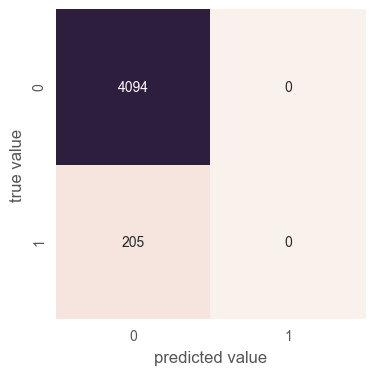

In [14]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X1, y1)
y2_model = model.predict(X2)

print 'accuracy score: {}'.format(accuracy_score(y2, y2_model))

mat = confusion_matrix(y2, y2_model)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


accuracy score: 0.952314491742


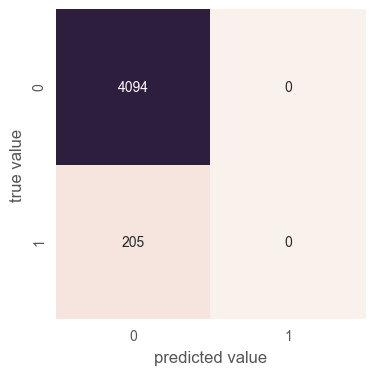

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(X1, y1)
y2_model = model.predict(X2)

print 'accuracy score: {}'.format(accuracy_score(y2, y2_model))

mat = confusion_matrix(y2, y2_model)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [16]:
from sklearn.neighbors import KNeighborsClassifier

accuracy score: 0.907420330309


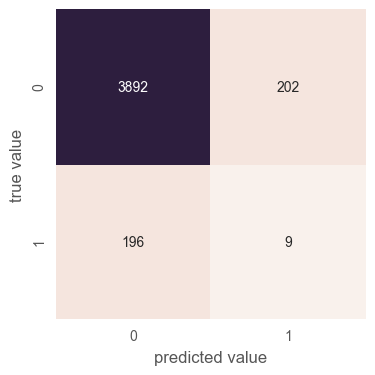

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X1, y1)
y2_model = model.predict(X2)

print 'accuracy score: {}'.format(accuracy_score(y2, y2_model))

mat = confusion_matrix(y2, y2_model)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X, y)

model.fit(X1, y1)

mat = confusion_matrix(y, y_model)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

/Users/samstone/venvs/pdsh/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)